In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse import csr_matrix

# Task 1: Load the network data
# Load the adjacency matrix from the file 'AdjMatrix.mat'
data = scipy.io.loadmat("/AdjMatrix.mat")
AdjMatrix =csr_matrix(data['AdjMatrix'])

# Check the sparsity of the matrix
num_elements = AdjMatrix.shape[0] * AdjMatrix.shape[1]
num_non_zero_elements = AdjMatrix.nnz
nnzAdjMatrix = num_non_zero_elements / num_elements

print(f"Sparsity of AdjMatrix: {nnzAdjMatrix:.4f}")

Sparsity of AdjMatrix: 0.0015


In [26]:
# Task 2: Check the dimensions of the matrix
m, n = AdjMatrix.shape
print(f"Dimensions of AdjMatrix: {m} x {n}")

Dimensions of AdjMatrix: 8297 x 8297


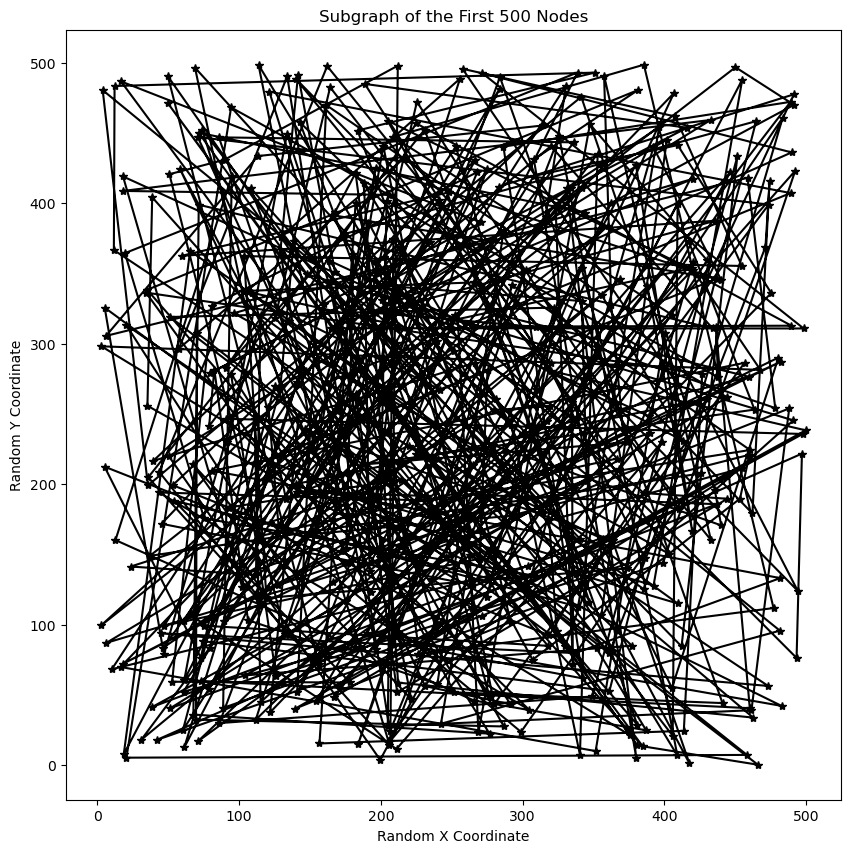

AdjMatrixSmall shape: (500, 500)
Coordinates shape: (500, 2)
NumNetwork: 500


In [27]:
#3

import matplotlib.pyplot as plt
import networkx as nx


# # Set the variable NumNetwork
# NumNetwork = 500

# # Extract the submatrix AdjMatrixSmall
# AdjMatrixSmall = AdjMatrix[:NumNetwork, :NumNetwork]

# # Generate random coordinates for the nodes
# np.random.seed(0)  # for reproducibility
# coordinates = np.random.rand(NumNetwork, 2) * NumNetwork

# # Create a graph from the submatrix
# G = nx.from_scipy_sparse_matrix(AdjMatrixSmall)

# # Plot the graph
# plt.figure(figsize=(10, 10))
# nx.draw(G, pos=coordinates, node_color='k', edge_color='k', node_size=50, with_labels=False)
# plt.title('Subgraph of the first 500 nodes in the network')
# plt.show()

# Task 3: Create a smaller submatrix and plot the network
NumNetwork = 500
AdjMatrixSmall = AdjMatrix[:NumNetwork, :NumNetwork].toarray() # Extract submatrix

# Generate random coordinates for the nodes
#np.random.seed(0)  # For reproducibility
coordinates = np.random.rand(NumNetwork, 2) * NumNetwork  # Random coordinates


# Plot the graph
plt.figure(figsize=(10, 10))
plt.plot(coordinates[:, 0], coordinates[:, 1], 'k-*')
plt.title('Subgraph of the First 500 Nodes')
plt.xlabel('Random X Coordinate')
plt.ylabel('Random Y Coordinate')
plt.show()

# Variables
print(f"AdjMatrixSmall shape: {AdjMatrixSmall.shape}")
print(f"Coordinates shape: {coordinates.shape}")
print(f"NumNetwork: {NumNetwork}")

In [28]:
# 4. Compute the Google Matrix
alpha = 0.15
GoogleMatrix = np.zeros((NumNetwork, NumNetwork))

# Check the amount of links originating from each webpage
NumLinks = np.sum(AdjMatrixSmall, axis=1)

for i in range(NumNetwork):
    if NumLinks[i] != 0:
        GoogleMatrix[i, :] = AdjMatrixSmall[i, :] / NumLinks[i]
    else:
        GoogleMatrix[i, :] = 1.0 / NumNetwork

GoogleMatrix = (1 - alpha) * GoogleMatrix + alpha * np.ones((NumNetwork, NumNetwork)) / NumNetwork

# Compute the vectors w0, w1, w2, w3, w5, w10
w0 = np.ones(NumNetwork) / np.sqrt(NumNetwork)
w1 = w0 @ GoogleMatrix
w2 = w1 @ GoogleMatrix
w3 = w2 @ GoogleMatrix
w10 = w0 @ (GoogleMatrix ** 10)
w5 = w0 @ (GoogleMatrix ** 5)
deltaw = w10 - w5
print("Difference δw:", np.linalg.norm(deltaw))

Difference δw: 0.27914257785554375


In [29]:
# 5. Compute eigenvalues and eigenvectors
eigenvalues, right_eigenvectors = np.linalg.eig(GoogleMatrix)

# Find the index of the eigenvalue λ1 = 1
lambda_1_index = np.isclose(eigenvalues, 1)

# Get the right eigenvector corresponding to λ1
v1 = right_eigenvectors[:, lambda_1_index].flatten()

# Compute the left eigenvectors
left_eigenvalues, left_eigenvectors = np.linalg.eig(GoogleMatrix.T)

# Get the left eigenvector corresponding to λ1
u1 = left_eigenvectors[:, lambda_1_index].flatten()
print("Left Eigenvector (u1):", u1)

Left Eigenvector (u1): [0.00812904+0.j 0.00812904+0.j 0.05702564+0.j 0.00812904+0.j
 0.00812904+0.j 0.06186702+0.j 0.00812904+0.j 0.06811084+0.j
 0.00812904+0.j 0.11192951+0.j 0.00812904+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.05203524+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.04062909+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.03169821+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j 0.3886436 +0.j
 0.06800021+0.j 0.03281252+0.j 0.00812904+0.j 0.03374585+0.j
 0.0651633 +0.j 0.06022539+0.j 0.12225881+0.j 0.03297814+0.j
 0.00812904+0.j 0.02727024+0.j 0.04807029+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j
 0.03899168+0.j 0.09506016+0.j 0.00812904+0.j 0.00812904+0.j
 0.00812904+0.j 0.07554265+0.j 0.12527133+0.j 0.1324135 +0.j
 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j
 0.04593397+0.j 0.00812904+0.j 0.00812904+0.j 0.00866055+0.j
 

In [30]:
# 6. Normalize u1 to have all positive components
u1 = np.abs(u1) / np.linalg.norm(u1, 1)


In [31]:
# 7. Find the maximal element and its index
MaxRank, PageMaxRank = np.max(u1), np.argmax(u1)
print(f"MaxRank: {MaxRank}, PageMaxRank: {PageMaxRank}")

MaxRank: 0.03330511037525553, PageMaxRank: 27


In [32]:
# 8. Find the page with the most hyperlinks
MostLinks = np.sum(AdjMatrixSmall, axis=0)  # Sum of columns
MaxLinks, PageMaxLinks = np.max(MostLinks), np.argmax(MostLinks)
print(f"MostLinks: {MostLinks}, MaxLinks: {MaxLinks}, PageMaxLinks: {PageMaxLinks}")


MostLinks: [  0.   0.  31.   0.   0.  20.   0.  40.   0.  15.   0.   0.   0.   0.
  35.   0.   0.   0.  22.   0.   0.   0.  22.   0.   0.   0.   0. 122.
  35.  23.   0.  14.  34.  20.  43.  24.   0.  14.  23.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  19.  32.   0.   0.   0.  40.  56.  65.
   0.   0.   0.   0.  20.   0.   0.   1.   0.   0.   0.   0.   0.   0.
   0.  16.   0.   0.  64.   0.   0.   0.   0.  43.   0.   0.   0.   0.
   0.  55.   0.   0.  16.   0.   0.   0.  17.  27.  31.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  21.   0.   0.  11.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  19.   0.   0.  20.   0.  28.   0.   0.  35.   0.   0.   0.   0.  22.
   0.   0.   0.  29.   0.   0.  15.   0.   0.  20.  32.  44.  18.  18.
   1.   0.   0.   0.   0.   0.   0.   0.  14.   0.   0.   0.  12.  24.
   0.   0.  10.   0.   0.   0.  16.   0.   0.  35.   0.   0.   0.  31.
  27.   0.   0.   0.   0.   0.   0.   0.   0.  27.   0.   0.   0. 

In [33]:
# 9. Compare if MaxRank and MaxLinks are the same
are_equal = PageMaxRank == PageMaxLinks
print(f"Is the highest ranking webpage the same as the page with the most hyperlinks? {are_equal}")

# Q1: What is the number of hyperlinks pointing to the webpage MaxRank?
print(f"Number of hyperlinks pointing to the webpage MaxRank: {MostLinks[PageMaxRank]}")

Is the highest ranking webpage the same as the page with the most hyperlinks? True
Number of hyperlinks pointing to the webpage MaxRank: 122.0
